In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud

In [103]:
#root = '/content/drive/MyDrive/Colab Notebooks/Kaggle/Petfinder/'
root = 'D:/01.Document/Cao hoc/DL-ML/project/petfinder-adoption-prediction/train/'

In [104]:
raw_data = pd.read_csv(root + 'train.csv')

In [105]:
pd.set_option('display.max_columns', 12)
raw_data.head(7)

,Type,Name,Age,Breed1,Breed2,Gender,...,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,2,Nibble,3,299,0,1,...,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2
1,2,No Name Yet,1,265,0,1,...,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0
2,1,Brisco,1,307,0,1,...,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3
3,1,Miko,4,307,0,2,...,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2
4,1,Hunter,1,307,0,1,...,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2
5,2,NaN,3,266,0,2,...,22fe332bf9c924d4718005891c63fbed,0,This is a stray kitten that came to my house. ...,d24c30b4b,2.0,2
6,2,BULAT,12,264,264,1,...,1e0b5a458b5b77f5af581d57ebf570b3,0,anyone within the area of ipoh or taiping who ...,1caa6fcdb,3.0,1


In [106]:
pd.set_option('display.max_columns', 12)
raw_data.tail(8)

,Type,Name,Age,Breed1,Breed2,Gender,...,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
14985,1,Terry,24,179,307,1,...,719987dce7aeb027fdfa91b480800199,0,been at my place for a while..am hoping to fin...,e7f7066b6,0.0,4
14986,2,Pets + Strays : BlueEyed BlackWhite,1,266,0,2,...,90569c3f7cb0af35cba5dac82c0ac9d7,0,1 month old white + grey kitten for adoption n...,36e7f8d83,1.0,3
14987,1,Snowy,6,195,0,2,...,79309f4027f2fedb4349a298c69fe56f,0,ooooo,4d163b731,1.0,0
14988,2,NaN,2,266,0,3,...,61c84bd7bcb6fb31d2d480b1bcf9682e,0,I have 4 kittens that need to be adopt urgentl...,dc0935a84,3.0,2
14989,2,Serato & Eddie,60,265,264,3,...,1d5096c4a5e159a3b750c5cfcf6ceabf,0,Serato(female cat- 3 color) is 4 years old and...,a01ab5b30,3.0,4
14990,2,Monkies,2,265,266,3,...,6f40a7acfad5cc0bb3e44591ea446c05,0,"Mix breed, good temperament kittens. Love huma...",d981b6395,5.0,3
14991,2,Ms Daym,9,266,0,2,...,c311c0c569245baa147d91fa4e351ae4,0,she is very shy..adventures and independent..s...,e4da1c9e4,3.0,4
14992,1,Fili,1,307,307,1,...,9ed1d5493d223eaa5024c1a031dbc9c2,0,Fili just loves laying around and also loves b...,a83d95ead,1.0,3


In [107]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14993 entries, 0 to 14992
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Type           14993 non-null  int64  
 1   Name           13736 non-null  object 
 2   Age            14993 non-null  int64  
 3   Breed1         14993 non-null  int64  
 4   Breed2         14993 non-null  int64  
 5   Gender         14993 non-null  int64  
 6   Color1         14993 non-null  int64  
 7   Color2         14993 non-null  int64  
 8   Color3         14993 non-null  int64  
 9   MaturitySize   14993 non-null  int64  
 10  FurLength      14993 non-null  int64  
 11  Vaccinated     14993 non-null  int64  
 12  Dewormed       14993 non-null  int64  
 13  Sterilized     14993 non-null  int64  
 14  Health         14993 non-null  int64  
 15  Quantity       14993 non-null  int64  
 16  Fee            14993 non-null  int64  
 17  State          14993 non-null  int64  
 18  Rescue

In [108]:
raw_data.isnull().sum()

Type                0
Name             1257
Age                 0
Breed1              0
Breed2              0
Gender              0
Color1              0
Color2              0
Color3              0
MaturitySize        0
FurLength           0
Vaccinated          0
Dewormed            0
Sterilized          0
Health              0
Quantity            0
Fee                 0
State               0
RescuerID           0
VideoAmt            0
Description        12
PetID               0
PhotoAmt            0
AdoptionSpeed       0
dtype: int64

In [100]:
raw_data.describe()

,Type,Breed1,Breed2,Gender,Color1,Color2,...,AdoptionSpeed,Nametype,Numbercolor,DescriptionDetail,PCA_1,PCA_2
count,14987.000000,14987.000000,14987.000000,14987.000000,14987.000000,14987.00000,...,14987.000000,14987.000000,14987.000000,14987.000000,14987.000000,14987.000000
mean,1.457797,265.313805,74.039367,1.776073,2.234270,3.22306,...,2.516848,1.381597,1.994529,0.050921,0.084257,0.225753
std,0.498232,60.025095,123.027282,0.681616,1.745186,2.74261,...,1.177169,0.493292,0.768714,0.056034,40.770092,43.032677
min,1.000000,0.000000,0.000000,1.000000,1.000000,0.00000,...,0.000000,0.000000,1.000000,0.000150,-90.025597,-88.039223
25%,1.000000,265.000000,0.000000,1.000000,1.000000,0.00000,...,2.000000,1.000000,1.000000,0.017557,-29.096547,-33.522270
50%,1.000000,266.000000,0.000000,2.000000,2.000000,2.00000,...,2.000000,1.000000,2.000000,0.035714,-0.751865,-1.348499
75%,2.000000,307.000000,179.000000,2.000000,3.000000,6.00000,...,4.000000,2.000000,3.000000,0.064676,31.683387,32.684248
max,2.000000,307.000000,307.000000,3.000000,7.000000,7.00000,...,4.000000,2.000000,3.000000,1.000000,89.066078,101.936569


In [9]:
for col in raw_data.columns:
    print("Number unique of {}: {}".format(col,len(raw_data[col].unique())))

Number unique of Type: 2
Number unique of Name: 9061
Number unique of Age: 106
Number unique of Breed1: 176
Number unique of Breed2: 135
Number unique of Gender: 3
Number unique of Color1: 7
Number unique of Color2: 7
Number unique of Color3: 6
Number unique of MaturitySize: 4
Number unique of FurLength: 3
Number unique of Vaccinated: 3
Number unique of Dewormed: 3
Number unique of Sterilized: 3
Number unique of Health: 3
Number unique of Quantity: 19
Number unique of Fee: 74
Number unique of State: 14
Number unique of RescuerID: 5595
Number unique of VideoAmt: 9
Number unique of Description: 14033
Number unique of PetID: 14993
Number unique of PhotoAmt: 31
Number unique of AdoptionSpeed: 5


# **EDA**

<Figure size 720x360 with 0 Axes>

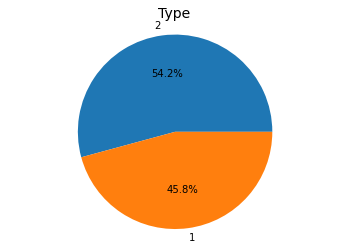

In [95]:
var = "Type"
plt.figure(figsize=(10, 5))
labels = raw_data[var].unique()
labels = list(map(str, labels))
sizes = []
for i in range(len(labels)):
    sizes.append(raw_data[var].value_counts()[i+1])
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=False)
ax1.axis('equal')
plt.title(var, fontsize=14);
plt.show()

<Figure size 720x360 with 0 Axes>

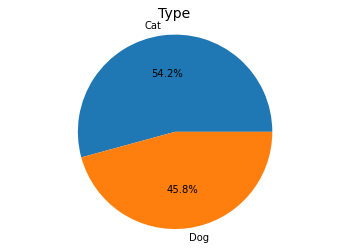

In [140]:
df = raw_data.copy()
df['Type'] = df['Type'].replace({1: 'Dog', 2: 'Cat'})
var = "Type"
plt.figure(figsize=(10, 5))
labels = df[var].unique()
labels = list(map(str, labels))
sizes = []
for i in range(len(labels)):
    sizes.append(df[var].value_counts()[i])
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=False)
ax1.axis('equal')
plt.title(var, fontsize=14);
plt.show()

(array([   0.,  500., 1000., 1500., 2000., 2500., 3000.]),
 <a list of 7 Text major ticklabel objects>)

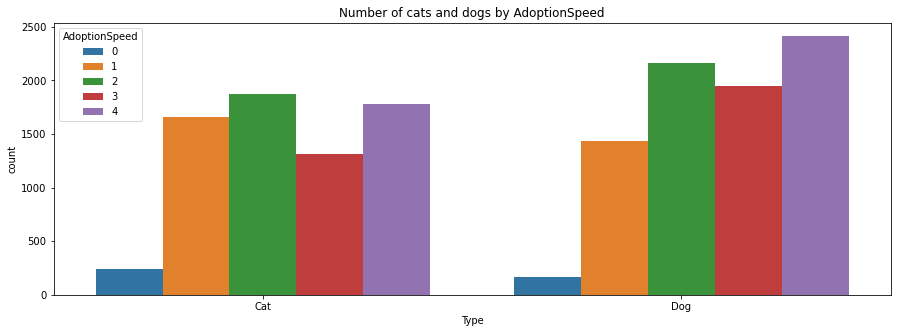

In [143]:
plt.subplots(figsize=(15,5))
g= sns.countplot(hue='AdoptionSpeed', data=df, x='Type');
plt.title('Number of cats and dogs by AdoptionSpeed');
plt.xticks(rotation = 'horizontal')
plt.yticks(fontsize = 10)

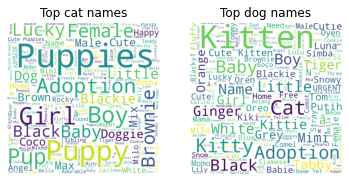

In [12]:
plt.subplot(1, 2, 1)
text_cat = ' '.join(raw_data.loc[raw_data['Type'] == 1, 'Name'].fillna('').values)
wordcloud = WordCloud(max_font_size=None, background_color='white',
                      width=600, height=600).generate(text_cat)
plt.imshow(wordcloud)
plt.title('Top cat names')
plt.axis("off")

plt.subplot(1, 2, 2)
text_dog = ' '.join(raw_data.loc[raw_data['Type'] == 2, 'Name'].fillna('').values)
wordcloud = WordCloud(max_font_size=None, background_color='white',
                      width=600, height=600).generate(text_dog)
plt.imshow(wordcloud)
plt.title('Top dog names')
plt.axis("off")

plt.show()

In [114]:
raw_data = raw_data.fillna('')

In [119]:
def nametype(df):
  if str(df['Name']) == '' or str(df['Name']).lower() == 'no name':
    kq = 'No name'
  elif any(char.isdigit() for char in str(df['Name'])):
    kq = 'Name with Number'
  else:
    kq = 'Standard name'
  return kq

raw_data['Nametype'] = raw_data.apply(lambda df: nametype(df), axis = 1)

In [123]:
raw_data.loc[raw_data['Nametype']=='No name']['Name']

5               
8               
19              
26       No Name
27       No Name
          ...   
14871           
14930           
14935           
14984           
14988           
Name: Name, Length: 1312, dtype: object

In [120]:
group = raw_data.groupby(['Nametype']).sum().reset_index()
group.head(10)

,Nametype,Type,Age,Breed1,Breed2,Gender,...,Quantity,Fee,State,VideoAmt,PhotoAmt,AdoptionSpeed
0,Name with Number,1729,6588,354420,127950,2555,...,2943,11295,52181369,76,5552.0,3086
1,No name,1959,9784,355916,78152,2688,...,3077,17569,54251084,55,4089.0,3406
2,Standard name,18166,140336,3266896,903526,21387,...,17610,289887,513468550,720,48670.0,31237


(array([   0.,  500., 1000., 1500., 2000., 2500., 3000., 3500., 4000.]),
 <a list of 9 Text major ticklabel objects>)

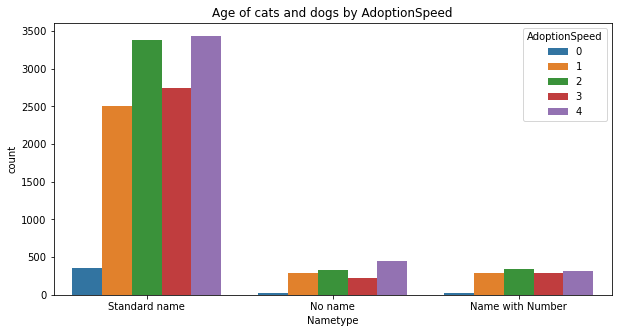

In [121]:

plt.subplots(figsize=(10,5))
g= sns.countplot(hue='AdoptionSpeed', data=raw_data, x='Nametype');
plt.title('Age of cats and dogs by AdoptionSpeed');
plt.xticks(rotation = 'horizontal')
plt.yticks(fontsize = 10)

<Figure size 720x360 with 0 Axes>

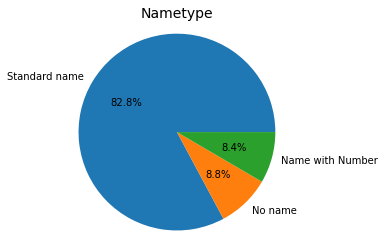

In [124]:
var = "Nametype"
plt.figure(figsize=(10, 5))
labels = raw_data[var].unique()
labels = list(map(str, labels))
sizes = []
for i in range(len(labels)):
  sizes.append(raw_data[var].value_counts()[i])
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=False)
ax1.axis('equal')
plt.title(var, fontsize=14);
plt.show()

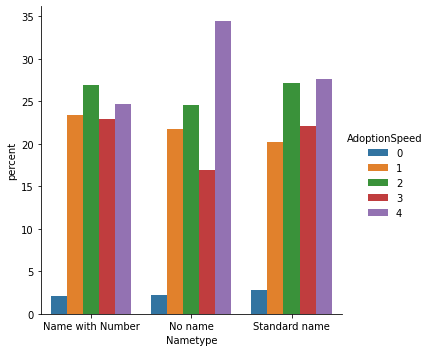

In [125]:
x,y = 'Nametype', 'AdoptionSpeed'

(raw_data
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar'))

(0.0, 160.0)

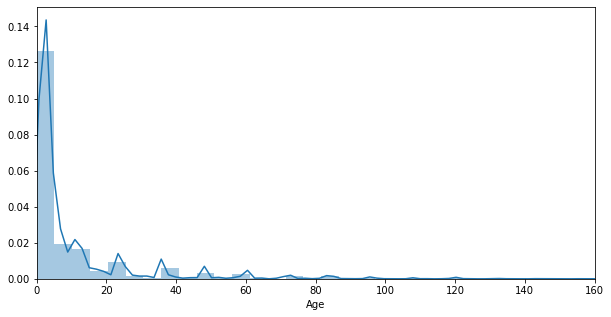

In [20]:
var = 'Age'
f, ax = plt.subplots(figsize=(10,5))

sns.distplot(raw_data[var])
plt.xlim([0,160])

In [21]:
def binningfunction(col, cut_points, labels = None):
  min_val = col.min()
  max_val = col.max()
  break_points = [min_val] + cut_points + [max_val]
  print(break_points)
  if not labels:
    labels = range(len(cut_points)+1)
  col_bin = pd.cut(col, bins = break_points, labels = labels, include_lowest=True)
  return col_bin

In [22]:
cut_points = []
labels = [1,2,3,4,5,6]
for i in range(12,72,12):
  cut_points.append(i)

raw_data['Age(year)'] = binningfunction(raw_data['Age'], cut_points, labels)

[0, 12, 24, 36, 48, 60, 255]


(array([   0.,  500., 1000., 1500., 2000., 2500., 3000., 3500., 4000.]),
 <a list of 9 Text major ticklabel objects>)

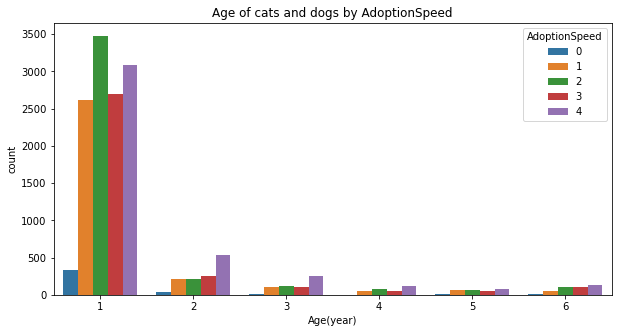

In [23]:
plt.subplots(figsize=(10,5))
g= sns.countplot(hue='AdoptionSpeed', data=raw_data, x='Age(year)');
plt.title('Age of cats and dogs by AdoptionSpeed');
plt.xticks(rotation = 'horizontal')
plt.yticks(fontsize = 10)

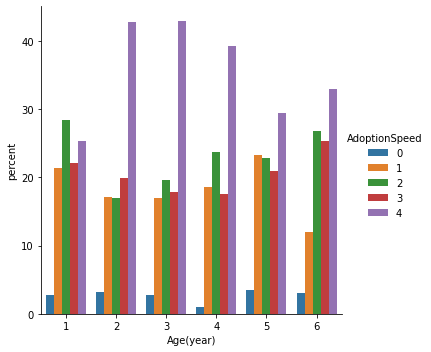

In [24]:
x,y = 'Age(year)', 'AdoptionSpeed'

(raw_data
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar'))

<Figure size 720x360 with 0 Axes>

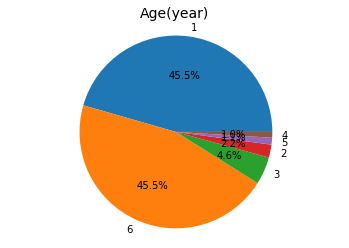

In [25]:
var = "Age(year)"
plt.figure(figsize=(10, 5))
labels = raw_data[var].unique()
labels = list(map(str, labels))
sizes = []
for i in range(len(labels)):
  sizes.append(raw_data[var].value_counts()[i])
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=False)
ax1.axis('equal')
plt.title(var, fontsize=14);
plt.show()

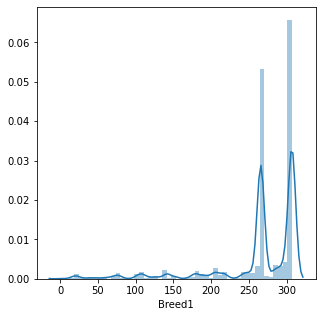

In [26]:
var = 'Breed1'
f, ax = plt.subplots(figsize=(5,5))
sns.distplot(raw_data[var])

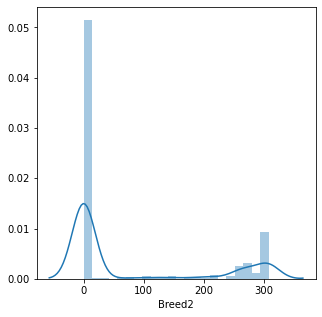

In [27]:
var = 'Breed2'
f, ax = plt.subplots(figsize=(5,5))
sns.distplot(raw_data[var])

In [28]:
raw_data['PureBreed'] = (raw_data["Breed1"] == 0) | (raw_data["Breed2"] == 0) | (raw_data["Breed1"] == raw_data["Breed2"])

<Figure size 720x360 with 0 Axes>

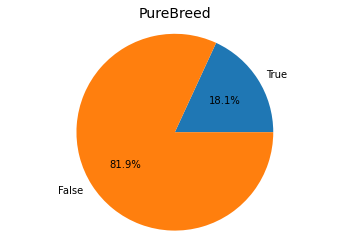

In [29]:
var = "PureBreed"
plt.figure(figsize=(10, 5))
labels = raw_data[var].unique()
labels = list(map(str, labels))
sizes = []
for i in range(len(labels)):
  sizes.append(raw_data[var].value_counts()[i])
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=False)
ax1.axis('equal')
plt.title(var, fontsize=14);
plt.show()

<Figure size 720x360 with 0 Axes>

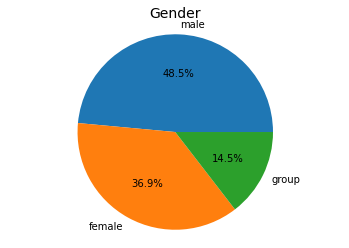

In [138]:
df = raw_data.copy()
df['Gender'] = df['Gender'].replace({1: 'male', 2: 'female',3:'group'})
var = "Gender"
plt.figure(figsize=(10, 5))
labels = df[var].unique()
labels = list(map(str, labels))
sizes = []
for i in range(len(labels)):
  sizes.append(df[var].value_counts()[i])
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=False)
ax1.axis('equal')
plt.title(var, fontsize=14);
plt.show()

In [139]:
df[var].value_counts()

female    7277
male      5536
group     2180
Name: Gender, dtype: int64

(array([  0., 100., 200., 300., 400., 500., 600., 700., 800., 900.]),
 <a list of 10 Text major ticklabel objects>)

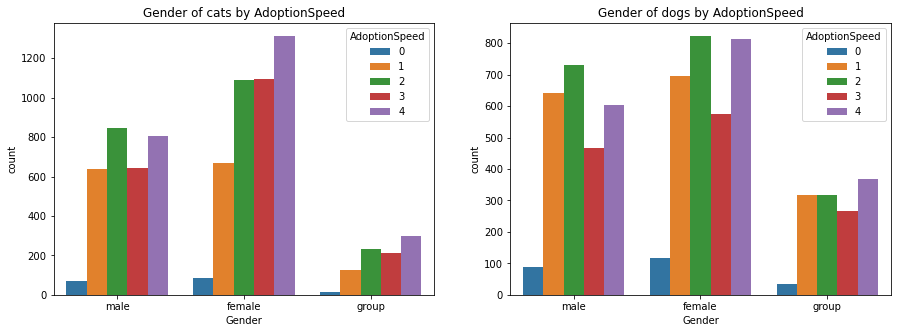

In [131]:
plt.subplots(figsize=(15,5))
plt.subplot(1, 2, 1)
g= sns.countplot(hue='AdoptionSpeed', data=df.loc[df["Type"]==1], x='Gender');
plt.title('Gender of cats by AdoptionSpeed');
plt.xticks(rotation = 'horizontal')
plt.yticks(fontsize = 10)

plt.subplot(1, 2, 2)
g= sns.countplot(hue='AdoptionSpeed', data=df.loc[df["Type"]==2], x='Gender');
plt.title('Gender of dogs by AdoptionSpeed');
plt.xticks(rotation = 'horizontal')
plt.yticks(fontsize = 10)


(array([   0.,  250.,  500.,  750., 1000., 1250., 1500., 1750., 2000.,
        2250.]),
 <a list of 10 Text major ticklabel objects>)

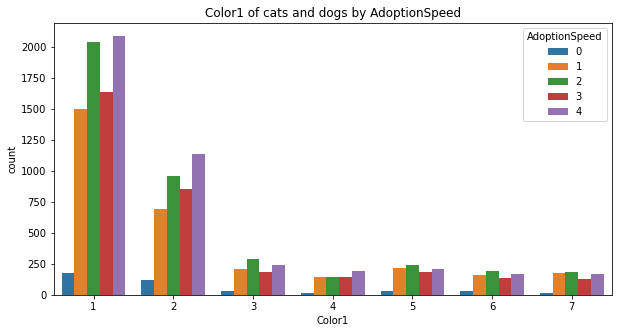

In [33]:
plt.subplots(figsize=(10,5))
g= sns.countplot(hue = 'AdoptionSpeed', data=raw_data, x='Color1');
plt.title('Color1 of cats and dogs by AdoptionSpeed');
plt.xticks(rotation = 'horizontal')
plt.yticks(fontsize = 10)

(array([   0.,  200.,  400.,  600.,  800., 1000., 1200., 1400., 1600.]),
 <a list of 9 Text major ticklabel objects>)

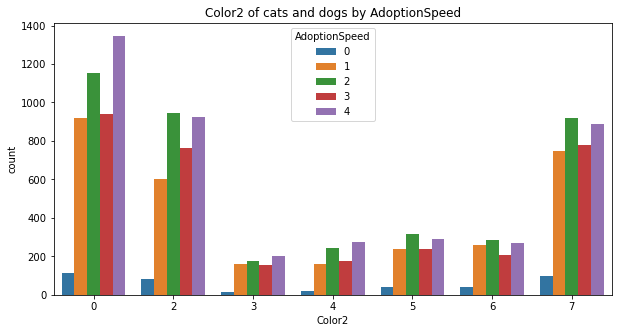

In [34]:
plt.subplots(figsize=(10,5))
g= sns.countplot(hue = 'AdoptionSpeed', data=raw_data, x='Color2');
plt.title('Color2 of cats and dogs by AdoptionSpeed');
plt.xticks(rotation = 'horizontal')
plt.yticks(fontsize = 10)

(array([   0.,  500., 1000., 1500., 2000., 2500., 3000., 3500.]),
 <a list of 8 Text major ticklabel objects>)

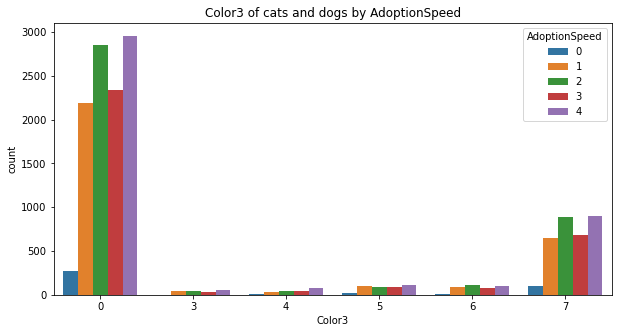

In [35]:
plt.subplots(figsize=(10,5))
g= sns.countplot( hue = 'AdoptionSpeed',data=raw_data, x='Color3');
plt.title('Color3 of cats and dogs by AdoptionSpeed');
plt.xticks(rotation = 'horizontal')
plt.yticks(fontsize = 10)

In [36]:
def numbercolor(df):
  if df['Color1'] != 0 and df['Color2'] != 0 and df['Color3'] != 0 :
    kq = 3
  elif (df['Color1'] == 0 and df['Color2'] != 0 and df['Color3'] != 0):
    kq = 2
  elif (df['Color1'] != 0 and df['Color2'] == 0 and df['Color3'] != 0):
    kq = 2
  elif (df['Color1'] != 0 and df['Color2'] != 0 and df['Color3'] == 0):
    kq = 2
  else:
    kq = 1
  return kq

raw_data['Numbercolor'] = raw_data.apply(lambda df: numbercolor(df), axis = 1)

<Figure size 720x360 with 0 Axes>

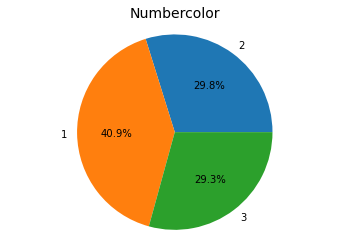

In [37]:
var = "Numbercolor"
plt.figure(figsize=(10, 5))
labels = raw_data[var].unique()
labels = list(map(str, labels))
sizes = []
for i in range(len(labels)):
  sizes.append(raw_data[var].value_counts()[i+1])
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=False)
ax1.axis('equal')
plt.title(var, fontsize=14);
plt.show()

(array([  0., 100., 200., 300., 400., 500., 600., 700., 800.]),
 <a list of 9 Text major ticklabel objects>)

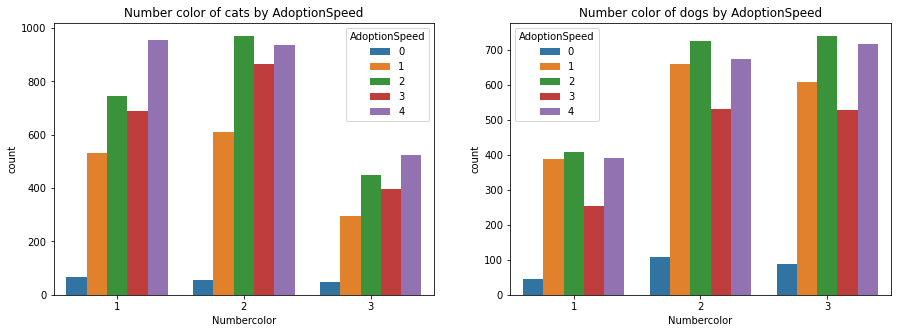

In [38]:
plt.subplots(figsize=(15,5))
plt.subplot(1, 2, 1)
g= sns.countplot(hue='AdoptionSpeed', data=raw_data.loc[raw_data["Type"]==1], x='Numbercolor');
plt.title('Number color of cats by AdoptionSpeed');
plt.xticks(rotation = 'horizontal')
plt.yticks(fontsize = 10)

plt.subplot(1, 2, 2)
g= sns.countplot(hue='AdoptionSpeed', data=raw_data.loc[raw_data["Type"]==2], x='Numbercolor');
plt.title('Number color of dogs by AdoptionSpeed');
plt.xticks(rotation = 'horizontal')
plt.yticks(fontsize = 10)


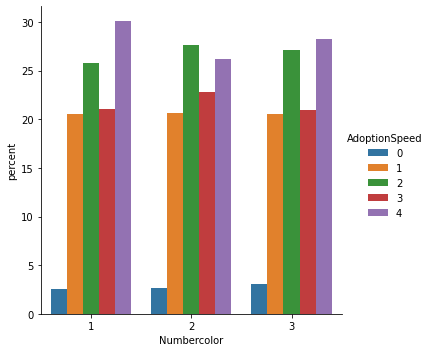

In [39]:
x,y = 'Numbercolor', 'AdoptionSpeed'

(raw_data
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar'))

<Figure size 720x360 with 0 Axes>

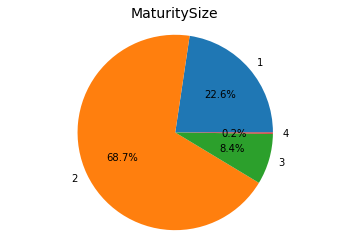

In [40]:
var = "MaturitySize"
plt.figure(figsize=(10, 5))
labels = raw_data[var].unique()
labels = list(map(str, labels))
sizes = []
for i in range(len(labels)):
  sizes.append(raw_data[var].value_counts()[i+1])
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=False)
ax1.axis('equal')
plt.title(var, fontsize=14);
plt.show()

(array([   0.,  200.,  400.,  600.,  800., 1000., 1200., 1400.]),
 <a list of 8 Text major ticklabel objects>)

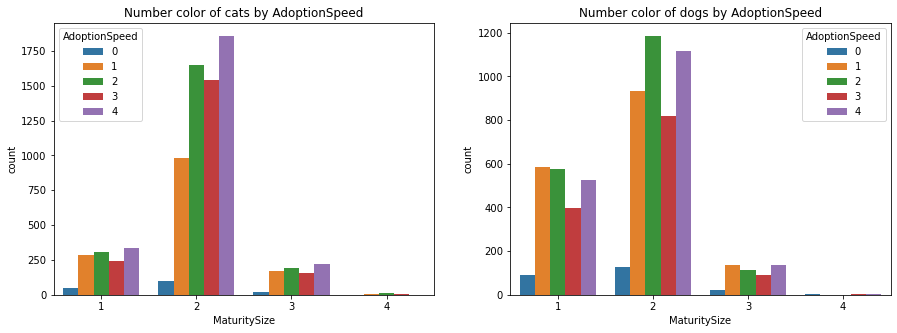

In [41]:
plt.subplots(figsize=(15,5))
plt.subplot(1, 2, 1)
g= sns.countplot(hue='AdoptionSpeed', data=raw_data.loc[raw_data["Type"]==1], x='MaturitySize');
plt.title('Number color of cats by AdoptionSpeed');
plt.xticks(rotation = 'horizontal')
plt.yticks(fontsize = 10)

plt.subplot(1, 2, 2)
g= sns.countplot(hue='AdoptionSpeed', data=raw_data.loc[raw_data["Type"]==2], x='MaturitySize');
plt.title('Number color of dogs by AdoptionSpeed');
plt.xticks(rotation = 'horizontal')
plt.yticks(fontsize = 10)



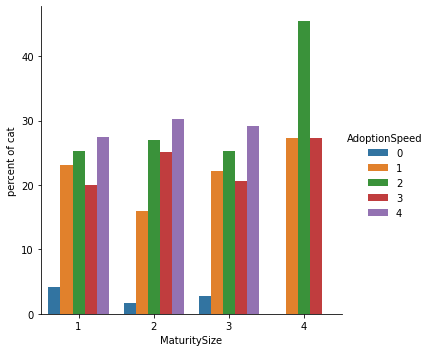

In [42]:
x,y = 'MaturitySize', 'AdoptionSpeed'

(raw_data.loc[raw_data["Type"]==1]
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent of cat')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent of cat',hue=y,kind='bar'))

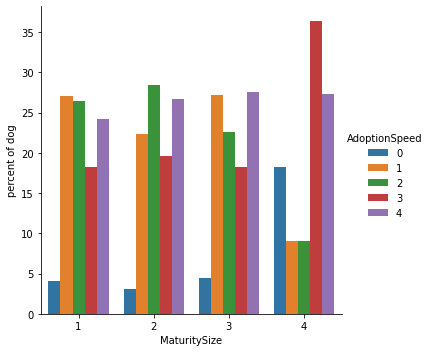

In [43]:
x,y = 'MaturitySize', 'AdoptionSpeed'

(raw_data.loc[raw_data["Type"]!=1]
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent of dog')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent of dog',hue=y,kind='bar'))

In [44]:
raw_data[var].value_counts()

2    10305
1     3395
3     1260
4       33
Name: MaturitySize, dtype: int64

(array([   0.,  200.,  400.,  600.,  800., 1000., 1200., 1400.]),
 <a list of 8 Text major ticklabel objects>)

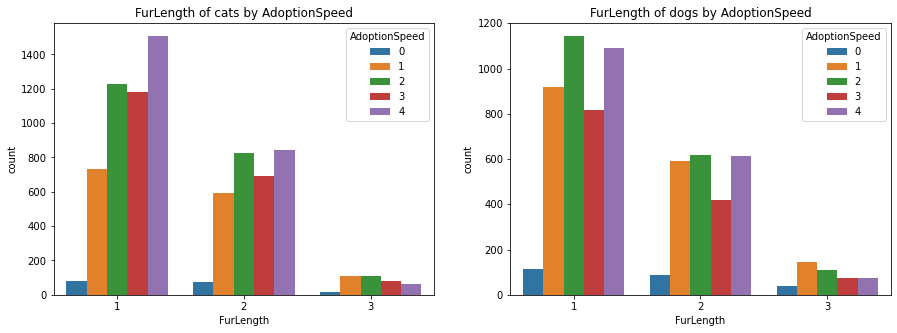

In [45]:
plt.subplots(figsize=(15,5))
plt.subplot(1, 2, 1)
g= sns.countplot(hue='AdoptionSpeed', data=raw_data.loc[raw_data["Type"]==1], x='FurLength');
plt.title('FurLength of cats by AdoptionSpeed');
plt.xticks(rotation = 'horizontal')
plt.yticks(fontsize = 10)

plt.subplot(1, 2, 2)
g= sns.countplot(hue='AdoptionSpeed', data=raw_data.loc[raw_data["Type"]==2], x='FurLength');
plt.title('FurLength of dogs by AdoptionSpeed');
plt.xticks(rotation = 'horizontal')
plt.yticks(fontsize = 10)



(array([   0.,  500., 1000., 1500., 2000., 2500., 3000., 3500., 4000.,
        4500.]),
 <a list of 10 Text major ticklabel objects>)

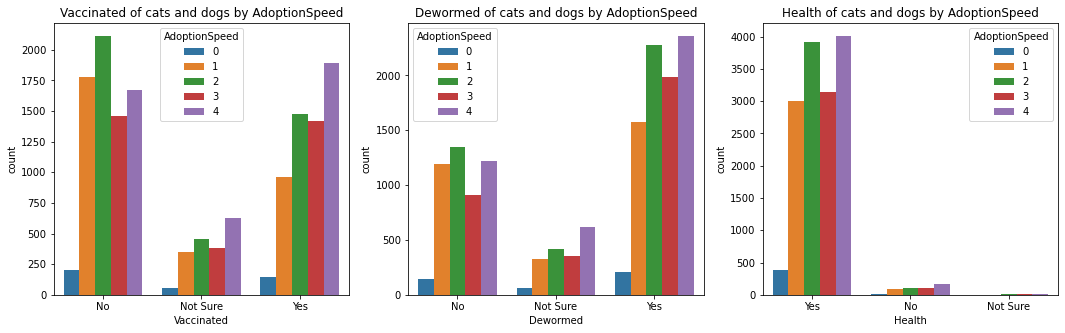

In [133]:
df = raw_data.copy()
df['Vaccinated'] = df['Vaccinated'].replace({1: 'Yes', 2: 'No',3:'Not Sure'})
df['Dewormed'] = df['Dewormed'].replace({1: 'Yes', 2: 'No',3:'Not Sure'})
df['Health'] = df['Health'].replace({1: 'Yes', 2: 'No',3:'Not Sure'})

plt.subplots(figsize=(18,5))
plt.subplot(1, 3, 1)
g= sns.countplot(hue='AdoptionSpeed', data=df, x='Vaccinated');
plt.title('Vaccinated of cats and dogs by AdoptionSpeed');
plt.xticks(rotation = 'horizontal')
plt.yticks(fontsize = 10)

plt.subplot(1, 3, 2)
g= sns.countplot(hue='AdoptionSpeed', data=df, x='Dewormed');
plt.title('Dewormed of cats and dogs by AdoptionSpeed');
plt.xticks(rotation = 'horizontal')
plt.yticks(fontsize = 10)

plt.subplot(1, 3, 3)
g= sns.countplot(hue='AdoptionSpeed', data=df, x='Health');
plt.title('Health of cats and dogs by AdoptionSpeed');
plt.xticks(rotation = 'horizontal')
plt.yticks(fontsize = 10)


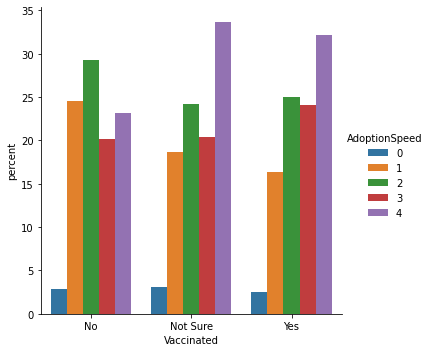

In [134]:
x,y = 'Vaccinated', 'AdoptionSpeed'

(df
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar'))

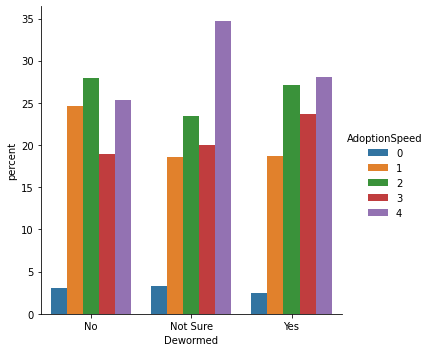

In [135]:
x,y = 'Dewormed', 'AdoptionSpeed'

(df
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar'))

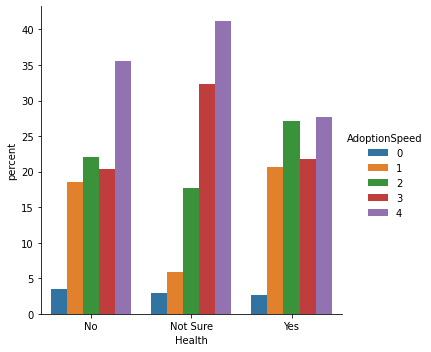

In [136]:
x,y = 'Health', 'AdoptionSpeed'

(df
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar'))

C:\Users\pqhie\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


(0.0, 19.0)

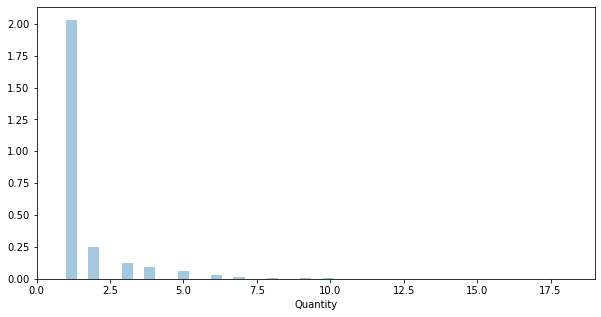

In [50]:
var = 'Quantity'
f, ax = plt.subplots(figsize=(10,5))

sns.distplot(raw_data[var])
plt.xlim([0,19])

In [51]:
cut_points = [2,5]
labels = ["Only 1",'2 - 5','Greater 5']
raw_data['QuantityRank'] = binningfunction(raw_data['Quantity'], cut_points, labels)

[1, 2, 5, 20]


<Figure size 720x360 with 0 Axes>

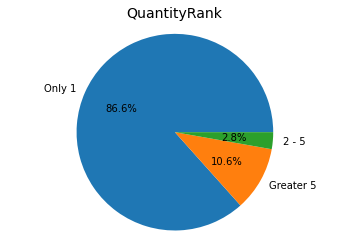

In [52]:
var = "QuantityRank"
plt.figure(figsize=(10, 5))
labels = raw_data[var].unique()
labels = list(map(str, labels))
sizes = []
for i in range(len(labels)):
  sizes.append(raw_data[var].value_counts()[i])
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=False)
ax1.axis('equal')
plt.title(var, fontsize=14);
plt.show()

In [53]:
raw_data[var].value_counts()

Only 1       12987
2 - 5         1590
Greater 5      416
Name: QuantityRank, dtype: int64

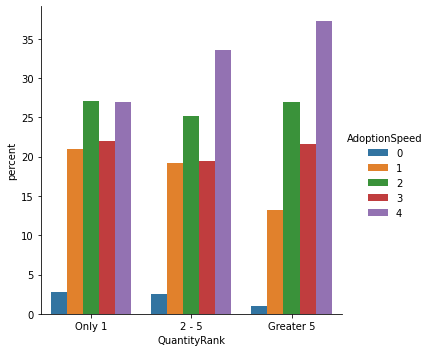

In [54]:
x,y = 'QuantityRank', 'AdoptionSpeed'

(raw_data
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar'))

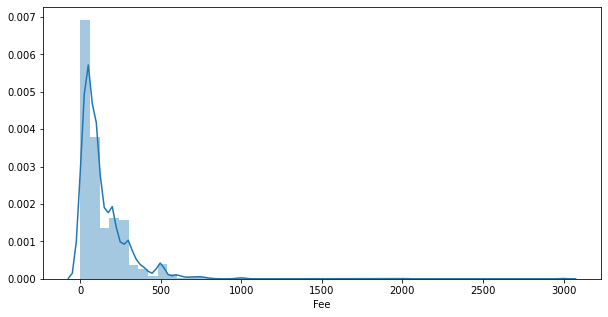

In [55]:
var = 'Fee'
f, ax = plt.subplots(figsize=(10,5))

sns.distplot(raw_data.loc[raw_data["Fee"] > 0][var])


<Figure size 720x360 with 0 Axes>

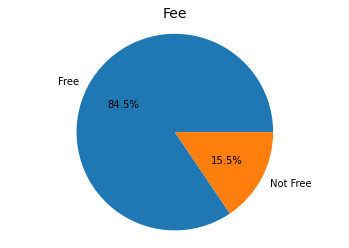

In [56]:
var = "Fee"
plt.figure(figsize=(10, 5))
labels = ['Free', 'Not Free']
sizes = [raw_data.loc[raw_data["Fee"] == 0][var].count(), raw_data.loc[raw_data["Fee"] > 0][var].count()]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=False)
ax1.axis('equal')
plt.title(var, fontsize=14);
plt.show()

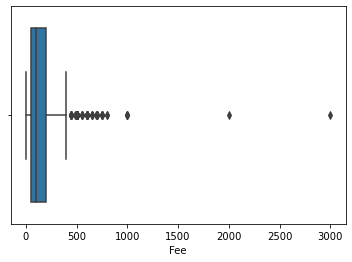

In [57]:
raw_data[var].value_counts()
#sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=raw_data.loc[raw_data["Fee"] > 0][var])

In [58]:
raw_data[var].value_counts()

0      12663
50       468
100      408
200      219
150      162
       ...  
210        1
99         1
330        1
75         1
599        1
Name: Fee, Length: 74, dtype: int64

In [59]:
raw_data = raw_data.loc[raw_data['Fee'] < 1000]

C:\Users\pqhie\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


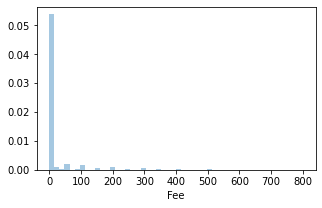

In [60]:
var = 'Fee'
f, ax = plt.subplots(figsize=(5,3))

sns.distplot(raw_data[var])

<Figure size 720x360 with 0 Axes>

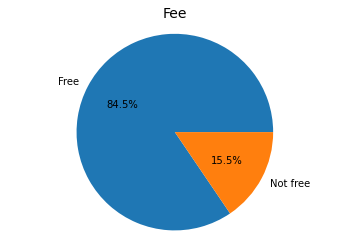

In [61]:
var = "Fee"
plt.figure(figsize=(10, 5))
labels = ['Free', 'Not free']
sizes = [raw_data.loc[raw_data[var] == 0][var].value_counts(),sum(raw_data.loc[raw_data[var] != 0][var].value_counts())]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=False)
ax1.axis('equal')
plt.title(var, fontsize=14);
plt.show()

(array([  0., 100., 200., 300., 400., 500., 600., 700., 800.]),
 <a list of 9 Text major ticklabel objects>)

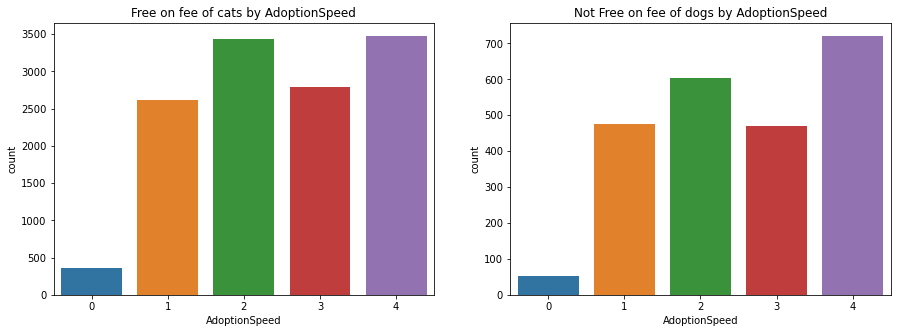

In [62]:
plt.subplots(figsize=(15,5))
plt.subplot(1, 2, 1)
g= sns.countplot( data=raw_data.loc[raw_data['Fee'] == 0], x='AdoptionSpeed');
plt.title('Free on fee of cats by AdoptionSpeed');
plt.xticks(rotation = 'horizontal')
plt.yticks(fontsize = 10)

plt.subplot(1, 2, 2)
g= sns.countplot( data=raw_data.loc[raw_data['Fee'] != 0], x='AdoptionSpeed');
plt.title('Not Free on fee of dogs by AdoptionSpeed');
plt.xticks(rotation = 'horizontal')
plt.yticks(fontsize = 10)


(array([    0.,  2000.,  4000.,  6000.,  8000., 10000.]),
 <a list of 6 Text major ticklabel objects>)

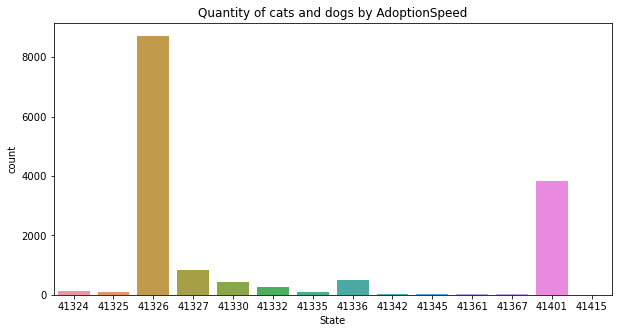

In [63]:
plt.subplots(figsize=(10,5))
g= sns.countplot( data=raw_data, x='State');
plt.title('Quantity of cats and dogs by AdoptionSpeed');
plt.xticks(rotation = 'horizontal')
plt.yticks(fontsize = 10)

In [64]:
raw_data['DescriptionDetail'] = raw_data['Description'].map(str).apply(len)
raw_data['DescriptionDetail'] = raw_data['DescriptionDetail']/raw_data['DescriptionDetail'].max()

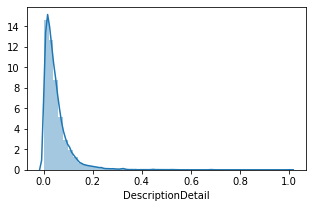

In [65]:
var = 'DescriptionDetail'
f, ax = plt.subplots(figsize=(5,3))

sns.distplot(raw_data[var])

(array([   0.,  500., 1000., 1500., 2000., 2500., 3000., 3500., 4000.]),
 <a list of 9 Text major ticklabel objects>)

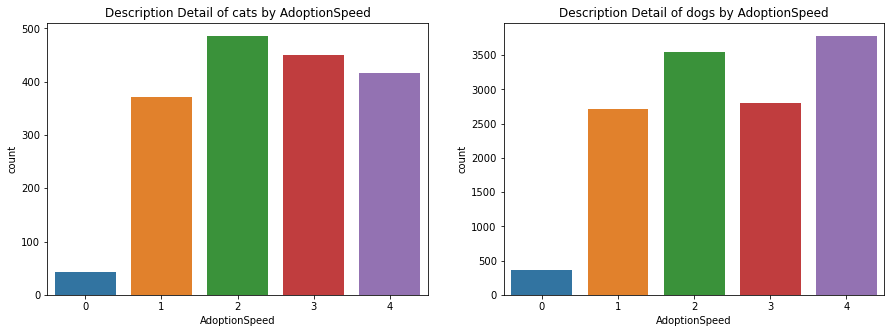

In [66]:
plt.subplots(figsize=(15,5))
plt.subplot(1, 2, 1)
g= sns.countplot( data=raw_data.loc[raw_data['DescriptionDetail'] > 0.1], x='AdoptionSpeed');
plt.title('Description Detail of cats by AdoptionSpeed');
plt.xticks(rotation = 'horizontal')
plt.yticks(fontsize = 10)

plt.subplot(1, 2, 2)
g= sns.countplot( data=raw_data.loc[raw_data['DescriptionDetail'] <= 0.1], x='AdoptionSpeed');
plt.title('Description Detail of dogs by AdoptionSpeed');
plt.xticks(rotation = 'horizontal')
plt.yticks(fontsize = 10)


In [67]:
raw_data['HaveVideo'] = (raw_data['VideoAmt']!=0)

In [68]:
raw_data['HavePhoto'] = (raw_data['PhotoAmt']!=0)

(array([   0.,  500., 1000., 1500., 2000., 2500., 3000., 3500., 4000.,
        4500.]),
 <a list of 10 Text major ticklabel objects>)

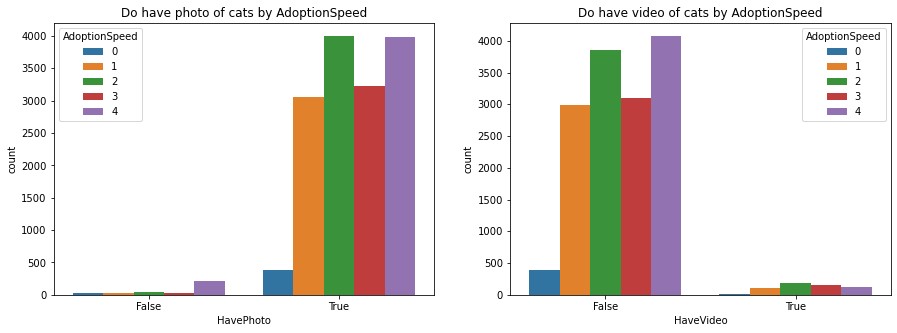

In [69]:
plt.subplots(figsize=(15,5))
plt.subplot(1, 2, 1)
g= sns.countplot( hue = 'AdoptionSpeed', data = raw_data, x='HavePhoto');
plt.title('Do have photo of cats by AdoptionSpeed');
plt.xticks(rotation = 'horizontal')
plt.yticks(fontsize = 10)

plt.subplot(1, 2, 2)
g= sns.countplot( hue = 'AdoptionSpeed', data = raw_data, x='HaveVideo');
plt.title('Do have video of cats by AdoptionSpeed');
plt.xticks(rotation = 'horizontal')
plt.yticks(fontsize = 10)

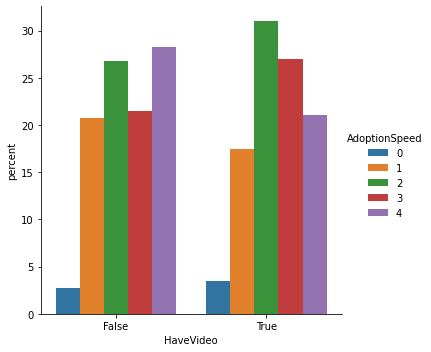

In [70]:
x,y = 'HaveVideo', 'AdoptionSpeed'

(raw_data
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar'))

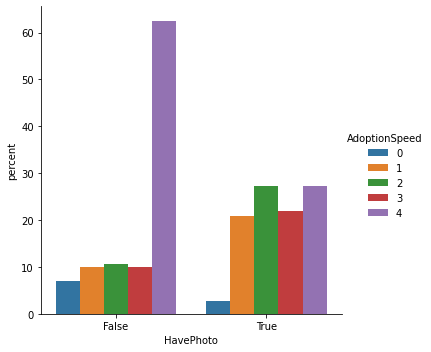

In [71]:
x,y = 'HavePhoto', 'AdoptionSpeed'

(raw_data
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar'))

<Figure size 720x360 with 0 Axes>

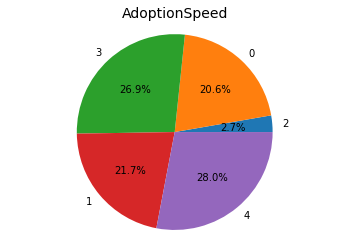

In [72]:
var = "AdoptionSpeed"
plt.figure(figsize=(10, 5))
labels = raw_data[var].unique()
labels = list(map(str, labels))
sizes = []
for i in range(len(labels)):
  sizes.append(raw_data[var].value_counts()[i])
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=False)
ax1.axis('equal')
plt.title(var, fontsize=14);
plt.show()

In [73]:
raw_data[var].value_counts()

4    4197
2    4035
3    3258
1    3088
0     409
Name: AdoptionSpeed, dtype: int64

In [74]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14987 entries, 0 to 14992
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Type               14987 non-null  int64   
 1   Name               13730 non-null  object  
 2   Age                14987 non-null  int64   
 3   Breed1             14987 non-null  int64   
 4   Breed2             14987 non-null  int64   
 5   Gender             14987 non-null  int64   
 6   Color1             14987 non-null  int64   
 7   Color2             14987 non-null  int64   
 8   Color3             14987 non-null  int64   
 9   MaturitySize       14987 non-null  int64   
 10  FurLength          14987 non-null  int64   
 11  Vaccinated         14987 non-null  int64   
 12  Dewormed           14987 non-null  int64   
 13  Sterilized         14987 non-null  int64   
 14  Health             14987 non-null  int64   
 15  Quantity           14987 non-null  int64   
 16  Fee 

In [75]:
raw_data = raw_data.drop(['PetID','VideoAmt','PhotoAmt','Age','Description','Quantity','Name','RescuerID'], axis = 1)

In [76]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14987 entries, 0 to 14992
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Type               14987 non-null  int64   
 1   Breed1             14987 non-null  int64   
 2   Breed2             14987 non-null  int64   
 3   Gender             14987 non-null  int64   
 4   Color1             14987 non-null  int64   
 5   Color2             14987 non-null  int64   
 6   Color3             14987 non-null  int64   
 7   MaturitySize       14987 non-null  int64   
 8   FurLength          14987 non-null  int64   
 9   Vaccinated         14987 non-null  int64   
 10  Dewormed           14987 non-null  int64   
 11  Sterilized         14987 non-null  int64   
 12  Health             14987 non-null  int64   
 13  Fee                14987 non-null  int64   
 14  State              14987 non-null  int64   
 15  AdoptionSpeed      14987 non-null  int64   
 16  Name

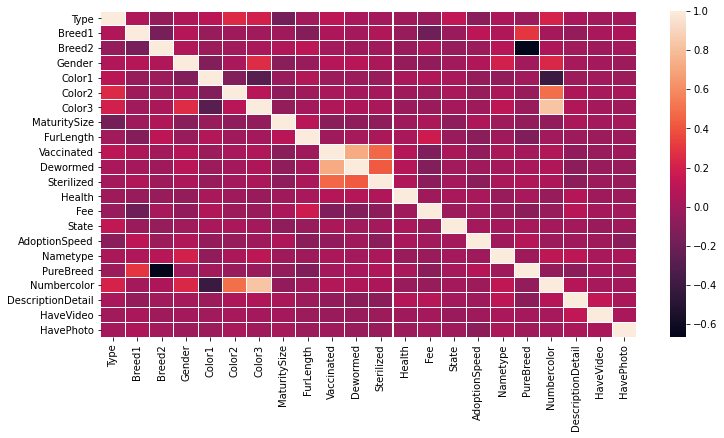

In [77]:
corr = raw_data.corr()
plt.subplots(figsize=(12,6))
sns.heatmap(corr, annot=False, linewidths=.05)

In [78]:
corr['AdoptionSpeed'].sort_values(ascending=False)

AdoptionSpeed        1.000000
Breed1               0.107436
PureBreed            0.076190
Gender               0.057595
MaturitySize         0.045736
Health               0.029327
State                0.013450
Fee                  0.000769
Color3              -0.006700
Nametype            -0.008717
DescriptionDetail   -0.010250
HaveVideo           -0.011717
Dewormed            -0.013247
Numbercolor         -0.015752
Breed2              -0.018857
Color2              -0.038688
Color1              -0.044326
Vaccinated          -0.059200
HavePhoto           -0.076694
Sterilized          -0.083335
FurLength           -0.090835
Type                -0.091599
Name: AdoptionSpeed, dtype: float64

In [79]:
#pca_data = raw_data.drop(['AdoptionSpeed','Name','RescuerID'], axis = 1)
pca_data = raw_data.copy()
#pca_data.info()

In [80]:
categorical_cols = pca_data.columns[pca_data.dtypes==object].tolist()
categorical_cols

[]

In [81]:
for col in categorical_cols:
    pca_data[col] = pca_data[col].astype('category')

In [82]:
categorical_cols = pca_data.columns[pca_data.dtypes=='category'].tolist()
categorical_cols

['Age(year)', 'QuantityRank']

In [83]:
for col in categorical_cols:
    pca_data[col] = pca_data[col].cat.codes

In [84]:
pca_data.head()

,Type,Breed1,Breed2,Gender,Color1,Color2,...,PureBreed,Numbercolor,QuantityRank,DescriptionDetail,HaveVideo,HavePhoto
0,2,299,0,1,1,7,...,True,2,0,0.053872,False,True
1,2,265,0,1,1,2,...,True,2,0,0.017707,False,True
2,1,307,0,1,2,7,...,True,2,0,0.058974,False,True
3,1,307,0,2,1,2,...,True,2,0,0.021909,False,True
4,1,307,0,1,1,0,...,True,1,0,0.058523,False,True


In [85]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
# fitting
scalar.fit(pca_data)
pca_data = scalar.transform(pca_data)

In [86]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

In [87]:
pca_tsne = make_pipeline(PCA(n_components=0.95), TSNE(n_components=2))
X_pca_tsne = pca_tsne.fit_transform(pca_data)

In [88]:
raw_data['PCA_1'] = X_pca_tsne[:,0]
raw_data['PCA_2'] = X_pca_tsne[:,1]

In [89]:
raw_data.loc[raw_data['AdoptionSpeed']==2]

,Type,Breed1,Breed2,Gender,Color1,Color2,...,QuantityRank,DescriptionDetail,HaveVideo,HavePhoto,PCA_1,PCA_2
0,2,299,0,1,1,7,...,Only 1,0.053872,False,True,85.262962,-16.203983
3,1,307,0,2,1,2,...,Only 1,0.021909,False,True,30.350183,-17.352026
4,1,307,0,1,1,0,...,Only 1,0.058523,False,True,-7.043720,-81.723190
5,2,266,0,2,5,6,...,Only 1,0.013055,False,True,74.548279,-32.318699
12,1,307,0,1,2,5,...,Only 1,0.051771,False,True,-43.935677,41.899681
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14966,2,265,0,1,1,2,...,Only 1,0.025660,True,True,-87.218170,-8.417363
14973,1,307,307,2,2,7,...,Only 1,0.001801,False,True,-9.349520,-24.856977
14974,1,307,0,1,1,2,...,Only 1,0.021158,False,True,9.767928,38.669170
14983,1,307,0,1,1,2,...,Only 1,0.031813,False,True,-41.884003,43.372490


In [90]:
raw_data.head(20)

,Type,Breed1,Breed2,Gender,Color1,Color2,...,QuantityRank,DescriptionDetail,HaveVideo,HavePhoto,PCA_1,PCA_2
0,2,299,0,1,1,7,...,Only 1,0.053872,False,True,85.262962,-16.203983
1,2,265,0,1,1,2,...,Only 1,0.017707,False,True,48.428276,-17.170565
2,1,307,0,1,2,7,...,Only 1,0.058974,False,True,-41.108776,-48.739117
3,1,307,0,2,1,2,...,Only 1,0.021909,False,True,30.350183,-17.352026
4,1,307,0,1,1,0,...,Only 1,0.058523,False,True,-7.043720,-81.723190
5,2,266,0,2,5,6,...,Only 1,0.013055,False,True,74.548279,-32.318699
6,2,264,264,1,1,0,...,Only 1,0.060024,False,True,-15.970745,3.577687
7,1,307,0,2,1,2,...,Greater 5,0.016357,False,True,31.548594,31.797548
8,2,265,0,2,6,0,...,Only 1,0.011855,False,True,32.018799,-60.221130
9,2,265,0,2,1,7,...,Only 1,0.034814,False,True,54.613117,-24.185238


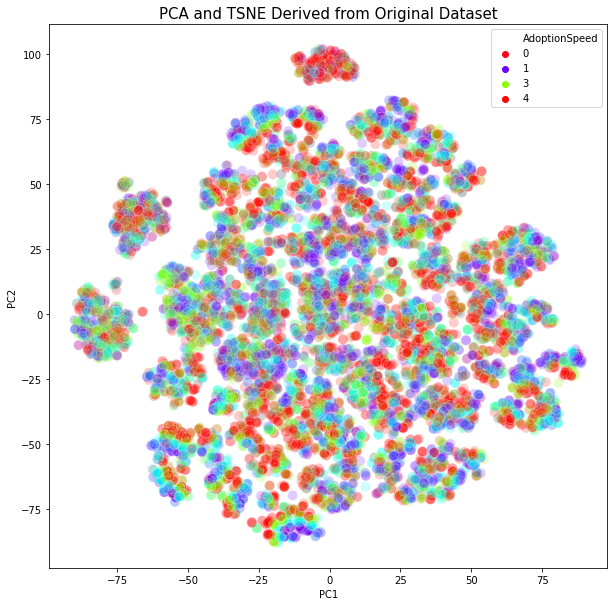

In [91]:
plt.figure(figsize = (10,10))
sns.scatterplot(raw_data['PCA_1'], raw_data['PCA_2'], 
                hue=raw_data['AdoptionSpeed'], 
                palette='hsv_r',
                s=100, alpha=0.2).set_title('PCA and TSNE Derived from Original Dataset', fontsize=15)
plt.legend()
plt.ylabel('PC2')
plt.xlabel('PC1')
plt.show()

In [92]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(pca_data)
x_pca = pca.transform(pca_data)
print(x_pca.shape)
print(sum(pca.explained_variance_ratio_))

(14987, 2)
0.20837840566063853


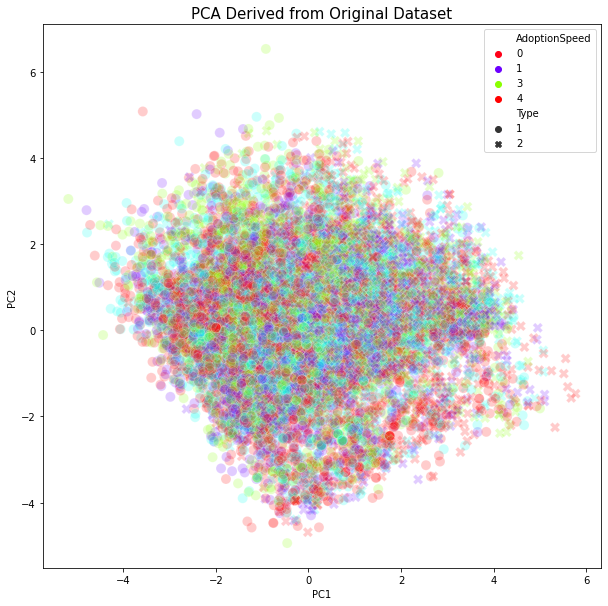

In [93]:
plt.figure(figsize = (10,10))
sns.scatterplot(x_pca[:,0], x_pca[:,1], 
                hue=raw_data['AdoptionSpeed'],
                style=raw_data['Type'], 
                palette='hsv_r',
                s=100, alpha=0.2).set_title('PCA Derived from Original Dataset', fontsize=15)
plt.legend()
plt.ylabel('PC2')
plt.xlabel('PC1')
plt.show()